In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style="darkgrid")

In [3]:
# Read the raw data
data_path = "C:/Users/neba/Desktop/finance_forecasting_project/data/raw/combined_financial_data.csv"
raw_data = pd.read_csv(data_path)

In [36]:
# Display basic information
print(f"Data shape: {raw_data.shape}")
raw_data.head()

Data shape: (2535, 15)


,TSLAClose,TSLAHigh,TSLALow,TSLAOpen,TSLAVolume,BNDClose,BNDHigh,BNDLow,BNDOpen,BNDVolume,SPYClose,SPYHigh,SPYLow,SPYOpen,SPYVolume
Date,,,,,,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,62.573116,62.603400,62.398984,62.406557,2218800,172.592865,173.811099,171.542672,173.391022,121465900
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,62.754803,62.777514,62.610955,62.641239,5820100,169.475983,171.702387,169.165130,171.534359,169632600
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,62.936565,63.125837,62.860858,62.860858,3887600,167.879639,170.316081,167.073085,169.786780,209151400
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,62.974369,63.050076,62.875950,62.944085,2433400,169.971619,170.316085,168.770204,169.223882,125346700
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,62.875931,62.921354,62.815363,62.921354,1873400,172.987732,173.206180,171.383047,171.399841,147217800


In [5]:
# Convert date to datetime
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)

In [6]:
print(raw_data.index)
print(raw_data.head())

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30'],
              dtype='datetime64[ns]', name='Date', length=2535, freq=None)
            TSLA_('Close', 'TSLA')  TSLA_('High', 'TSLA')  \
Date                                                        
2015-01-02               14.620667              14.883333   
2015-01-05               14.006000              14.433333   
2015-01-06               14.085333              14.280000   
2015-01-07               14.063333              14.318667   
2015-01-08               14.041333              14.253333   

            TSLA_('Low', 'TSLA')  TSLA_('Open', 'TSLA')  \
Date                                            

In [7]:
# Rename columns to remove special characters
raw_data.columns = [col.split(",")[0].replace("('", "").replace("')", "").replace("_", "") for col in raw_data.columns]

# Display the new column names
print(raw_data.columns)

Index(['TSLAClose'', 'TSLAHigh'', 'TSLALow'', 'TSLAOpen'', 'TSLAVolume'',
       'BNDClose'', 'BNDHigh'', 'BNDLow'', 'BNDOpen'', 'BNDVolume'',
       'SPYClose'', 'SPYHigh'', 'SPYLow'', 'SPYOpen'', 'SPYVolume''],
      dtype='object')


In [8]:
# Rename columns by stripping unwanted characters
raw_data.columns = [col.replace("'", "").replace("(", "").replace(")", "").replace(" ", "").replace("_", "") for col in raw_data.columns]

# Print cleaned column names
print(raw_data.columns)

Index(['TSLAClose', 'TSLAHigh', 'TSLALow', 'TSLAOpen', 'TSLAVolume',
       'BNDClose', 'BNDHigh', 'BNDLow', 'BNDOpen', 'BNDVolume', 'SPYClose',
       'SPYHigh', 'SPYLow', 'SPYOpen', 'SPYVolume'],
      dtype='object')


In [9]:
print(raw_data.head())  # View first few rows
print(raw_data.info())  # Check data types

            TSLAClose   TSLAHigh    TSLALow   TSLAOpen  TSLAVolume   BNDClose  \
Date                                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000    71466000  62.573116   
2015-01-05  14.006000  14.433333  13.810667  14.303333    80527500  62.754803   
2015-01-06  14.085333  14.280000  13.614000  14.004000    93928500  62.936565   
2015-01-07  14.063333  14.318667  13.985333  14.223333    44526000  62.974369   
2015-01-08  14.041333  14.253333  14.000667  14.187333    51637500  62.875931   

              BNDHigh     BNDLow    BNDOpen  BNDVolume    SPYClose  \
Date                                                                 
2015-01-02  62.603400  62.398984  62.406557    2218800  172.592865   
2015-01-05  62.777514  62.610955  62.641239    5820100  169.475983   
2015-01-06  63.125837  62.860858  62.860858    3887600  167.879639   
2015-01-07  63.050076  62.875950  62.944085    2433400  169.971619   
2015-01-08  

In [10]:
# Check for missing values
print("\nMissing values in each column:")
print(raw_data.isnull().sum())


Missing values in each column:
TSLAClose     0
TSLAHigh      0
TSLALow       0
TSLAOpen      0
TSLAVolume    0
BNDClose      0
BNDHigh       0
BNDLow        0
BNDOpen       0
BNDVolume     0
SPYClose      0
SPYHigh       0
SPYLow        0
SPYOpen       0
SPYVolume     0
dtype: int64


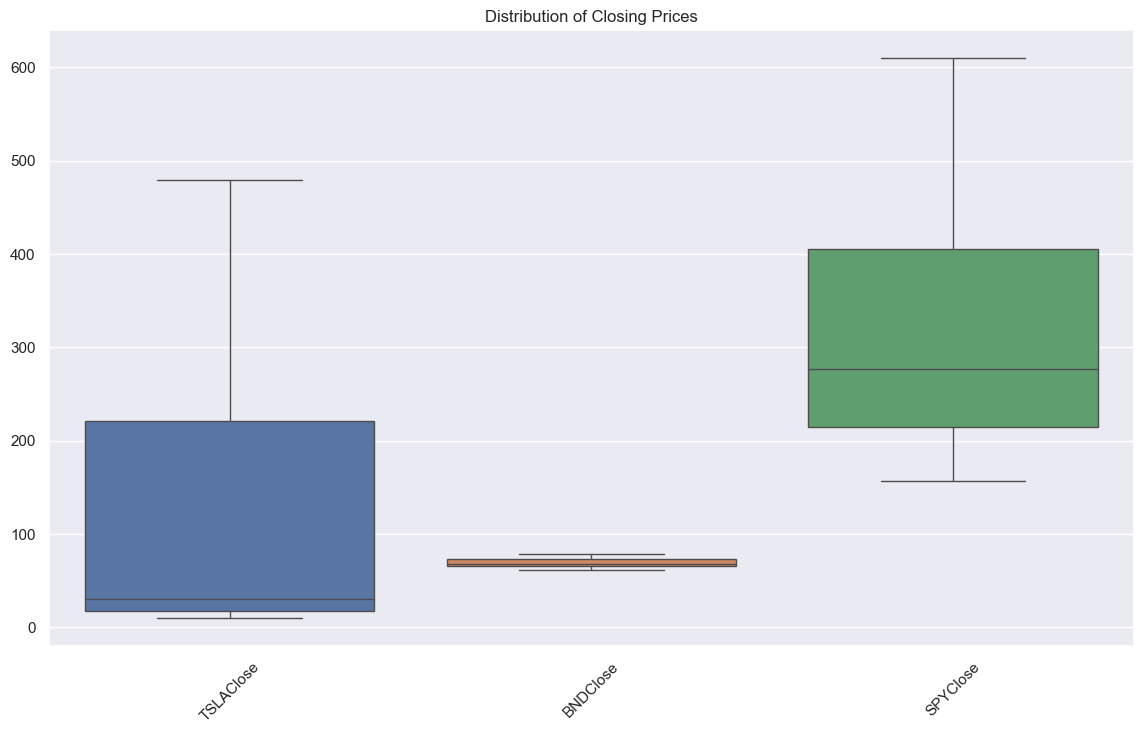

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the raw dataset
data_cleaned = raw_data.copy()

# Check for outliers using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned[['TSLAClose', 'BNDClose', 'SPYClose']])
plt.title('Distribution of Closing Prices')
plt.xticks(rotation=45)
plt.show()

Key Observations:

TSLA (Tesla):

Wide Range: Tesla exhibits a very wide range of closing prices, indicating high volatility. This is expected for a growth stock.
Skewed Distribution: The median line is closer to the bottom of the box, suggesting a right-skewed distribution. This means there are more data points clustered towards lower prices with a few very high prices pulling the average up.
Outliers: There are potential outliers at the higher end, as indicated by the whiskers extending further up.
BND (Vanguard Total Bond Market ETF):

Narrow Range: BND has a very narrow range of closing prices, demonstrating low volatility. This is typical for a bond ETF, which is designed to provide stability.
Symmetrical Distribution: The box appears relatively symmetrical, suggesting a more even distribution of prices around the median.
SPY (S&P 500 ETF):

Moderate Range: SPY has a moderate range of closing prices, reflecting the broader market's volatility.
Slightly Skewed: The box suggests a slight right skew, but less pronounced than TSLA.
Outliers: There are potential outliers at the higher end, similar to TSLA.
Insights for Portfolio Management:

Risk Assessment: The box plot visually confirms the risk profiles of these assets. TSLA is high-risk, high-volatility, BND is low-risk, low-volatility, and SPY is moderate-risk, moderate-volatility.
Diversification: Including all three assets in a portfolio could provide diversification benefits. TSLA offers potential growth, BND offers stability, and SPY offers broad market exposure.
Investment Strategy: The wide range of TSLA prices suggests it might be suitable for investors with a higher risk tolerance and a longer investment horizon. BND might be preferred by risk-averse investors seeking stability. SPY can be a core holding for investors aiming for market-matching returns.

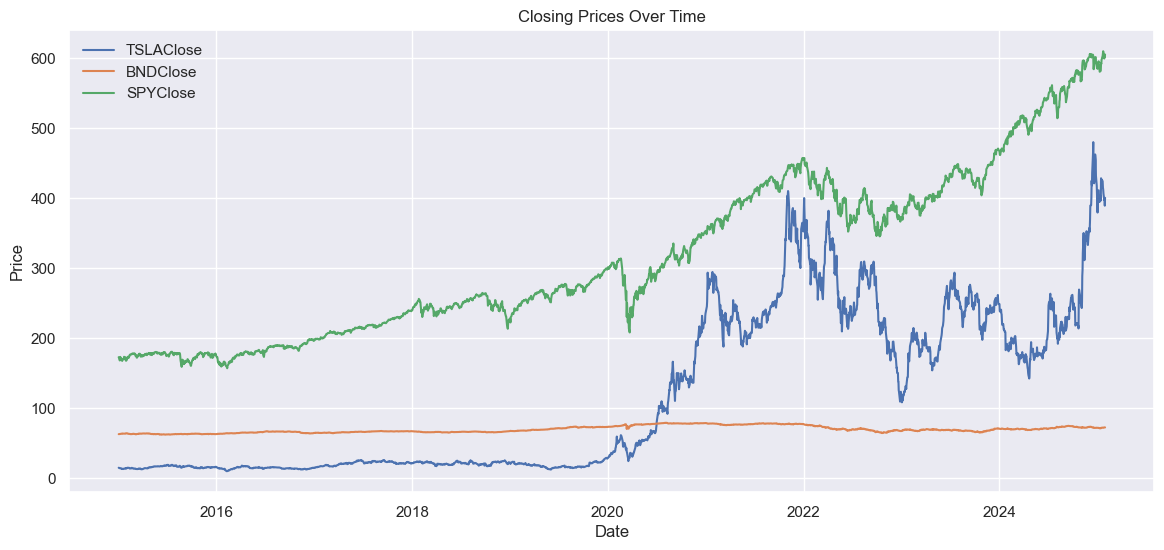

In [16]:
plt.figure(figsize=(14, 6))
for col in ['TSLAClose', 'BNDClose', 'SPYClose']:
    plt.plot(data_cleaned.index, data_cleaned[col], label=col)

plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
from scipy.stats import skew, kurtosis

stats_df = pd.DataFrame(index=['Skewness', 'Kurtosis'])
for col in ['TSLAClose', 'BNDClose', 'SPYClose']:
    stats_df[col] = [skew(data_cleaned[col]), kurtosis(data_cleaned[col])]

print("Skewness & Kurtosis of Closing Prices:")
print(stats_df)

Skewness & Kurtosis of Closing Prices:
          TSLAClose  BNDClose  SPYClose
Skewness   0.665801  0.483608  0.565665
Kurtosis  -0.886273 -0.981934 -0.683842


In [18]:
import numpy as np

confidence_level = 0.95  # 95% confidence interval
risk_metrics = pd.DataFrame(index=['Standard Deviation', 'VaR (95%)'])

for col in ['TSLAClose', 'BNDClose', 'SPYClose']:
    std_dev = np.std(data_cleaned[col])
    var_95 = np.percentile(data_cleaned[col], 100 * (1 - confidence_level))
    
    risk_metrics[col] = [std_dev, var_95]

print("\nRisk Metrics:")
print(risk_metrics)


Risk Metrics:
                     TSLAClose   BNDClose    SPYClose
Standard Deviation  116.485306   4.791200  117.903647
VaR (95%)            13.414334  62.800799  173.358185


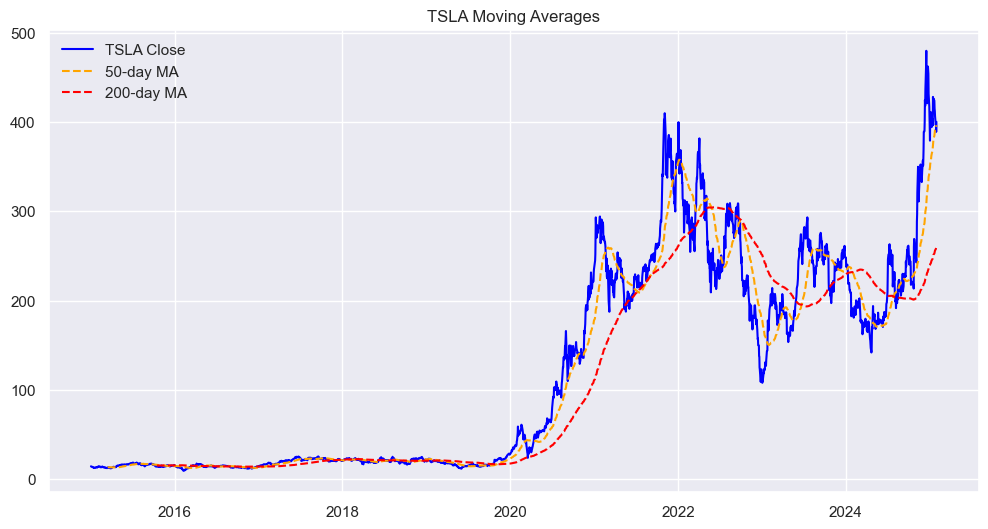

In [19]:
# Calculate Moving Averages
data_cleaned['TSLA_50_MA'] = data_cleaned['TSLAClose'].rolling(window=50).mean()
data_cleaned['TSLA_200_MA'] = data_cleaned['TSLAClose'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['TSLAClose'], label='TSLA Close', color='blue')
plt.plot(data_cleaned['TSLA_50_MA'], label='50-day MA', linestyle='dashed', color='orange')
plt.plot(data_cleaned['TSLA_200_MA'], label='200-day MA', linestyle='dashed', color='red')
plt.legend()
plt.title('TSLA Moving Averages')
plt.show()

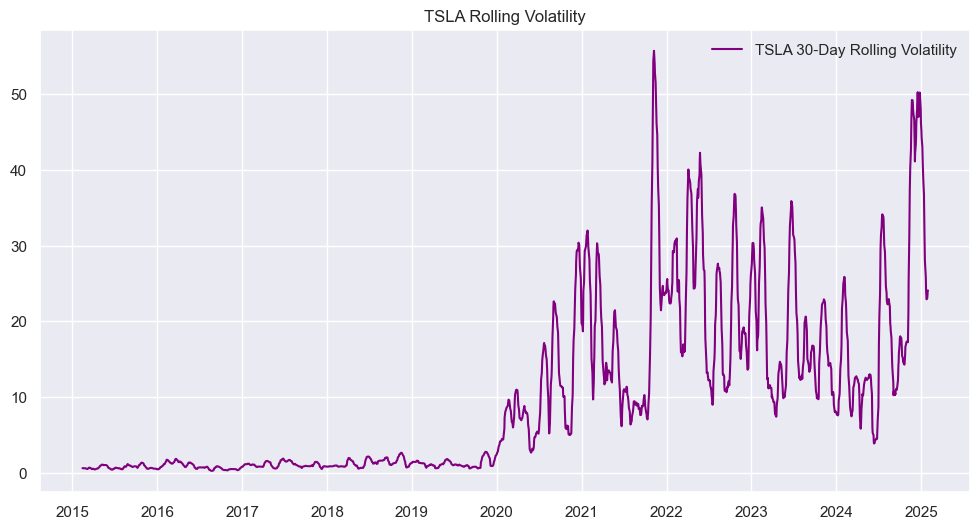

In [20]:
# Calculate Rolling Standard Deviation (Volatility)
data_cleaned['TSLA_Rolling_Std'] = data_cleaned['TSLAClose'].rolling(window=30).std()

# Plot Rolling Volatility
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['TSLA_Rolling_Std'], label='TSLA 30-Day Rolling Volatility', color='purple')
plt.legend()
plt.title('TSLA Rolling Volatility')
plt.show()

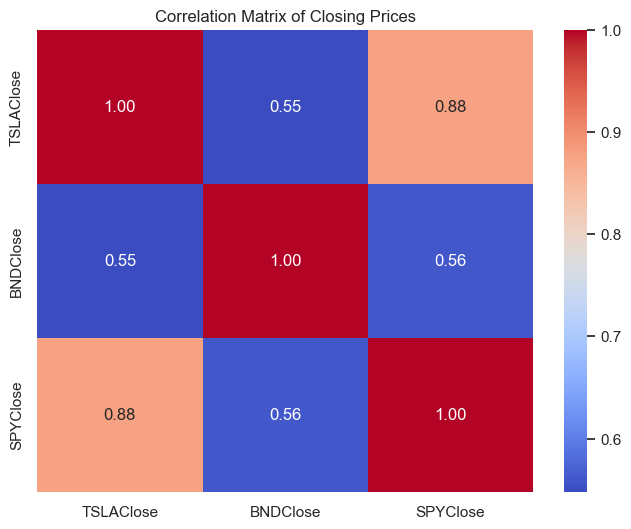

In [21]:
# Compute Correlation Matrix
corr_matrix = data_cleaned[['TSLAClose', 'BNDClose', 'SPYClose']].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Closing Prices')
plt.show()

In [22]:
# Define Risk-Free Rate (e.g., 3% annualized)
risk_free_rate = 0.03 / 252  # Convert to daily rate

# Calculate Daily Returns
returns = data_cleaned[['TSLAClose', 'BNDClose', 'SPYClose']].pct_change()

# Calculate Sharpe Ratio
sharpe_ratios = (returns.mean() - risk_free_rate) / returns.std()

print("\nSharpe Ratios:")
print(sharpe_ratios)


Sharpe Ratios:
TSLAClose    0.050912
BNDClose    -0.016535
SPYClose     0.039498
dtype: float64


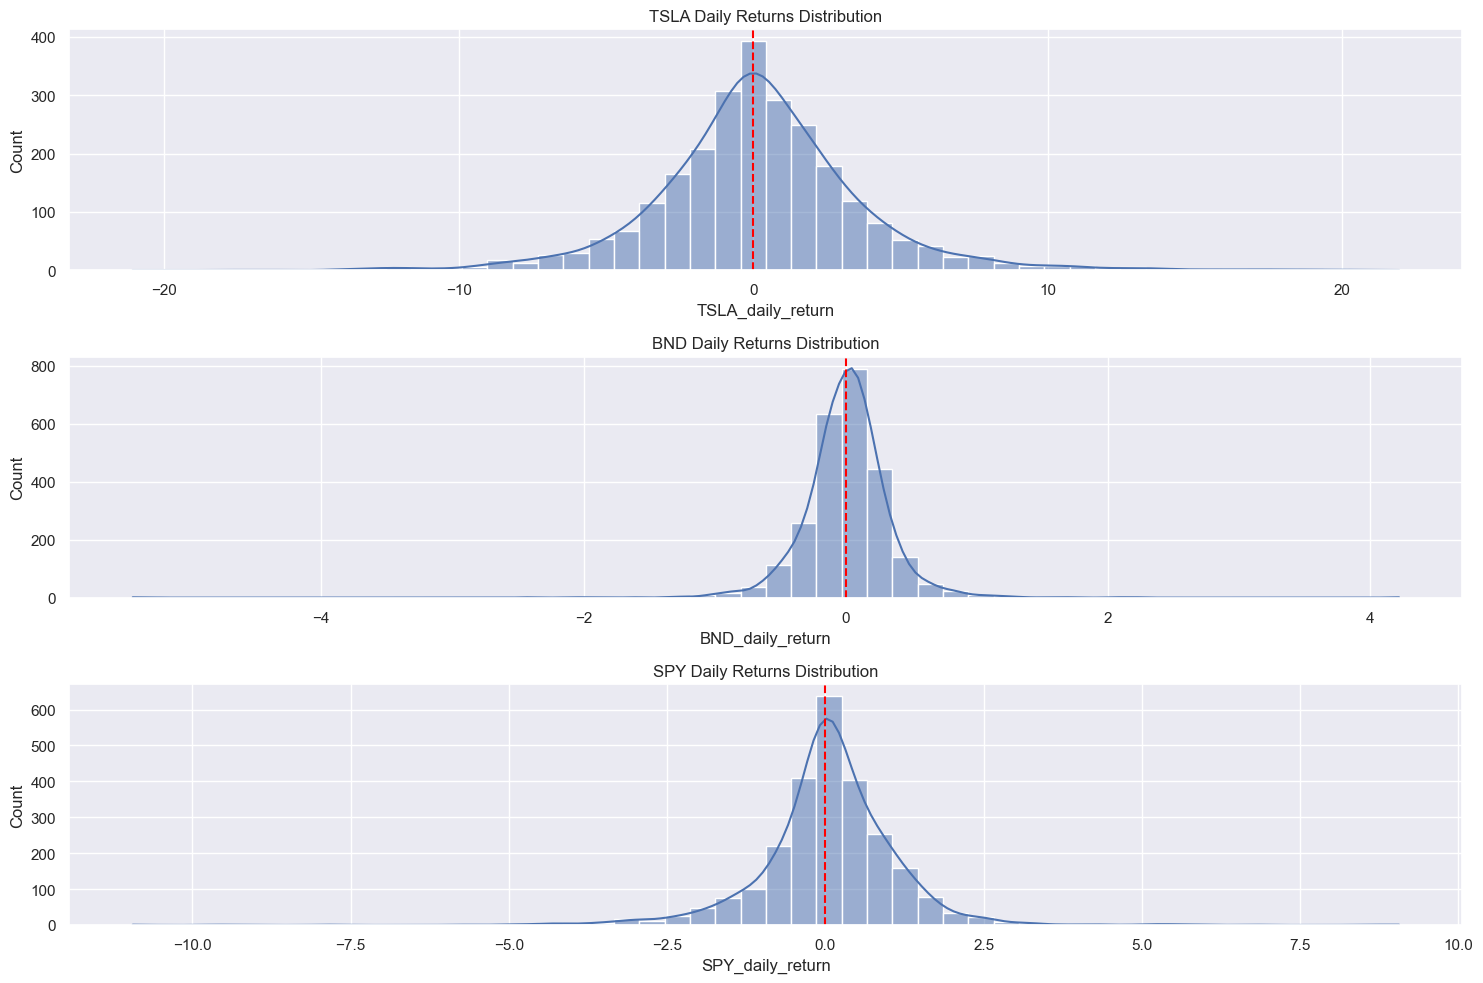


Returns Statistics:
       TSLA_daily_return  BND_daily_return  SPY_daily_return
count        2534.000000       2534.000000       2534.000000
mean            0.195216          0.006238          0.055680
std             3.600550          0.342688          1.108310
min           -21.062824         -5.438472        -10.942374
25%            -1.624070         -0.152724         -0.370257
50%             0.125968          0.012461          0.060079
75%             1.925577          0.172919          0.592892
max            21.919035          4.220069          9.060323


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create returns data
data_returns = pd.DataFrame()

for ticker in ['TSLA', 'BND', 'SPY']:
    data_returns[f'{ticker}_daily_return'] = data_cleaned[f'{ticker}Close'].pct_change() * 100

# Drop first row with NaN values
data_returns = data_returns.dropna()

# Analyze returns distribution
plt.figure(figsize=(15, 10))
for i, ticker in enumerate(['TSLA', 'BND', 'SPY']):
    plt.subplot(3, 1, i + 1)
    sns.histplot(data_returns[f'{ticker}_daily_return'], kde=True, bins=50)
    plt.title(f'{ticker} Daily Returns Distribution')
    plt.axvline(x=0, color='red', linestyle='--')  # Mark zero return
plt.tight_layout()
plt.show()

# Calculate basic statistics for returns
print("\nReturns Statistics:")
print(data_returns.describe())

In [24]:
data_cleaned.describe()

,TSLAClose,TSLAHigh,TSLALow,TSLAOpen,TSLAVolume,BNDClose,BNDHigh,BNDLow,BNDOpen,BNDVolume,SPYClose,SPYHigh,SPYLow,SPYOpen,SPYVolume,TSLA_50_MA,TSLA_200_MA,TSLA_Rolling_Std
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2486.000000,2336.000000,2506.000000
mean,117.848209,120.474827,115.097514,117.877662,1.120308e+08,69.289451,69.391261,69.186012,69.293224,4.233200e+06,316.067402,317.725660,314.157889,316.021385,8.714655e+07,116.004101,114.228151,9.700767
std,116.508288,119.236025,113.698930,116.611575,7.387509e+07,4.792146,4.800409,4.782142,4.793199,2.796083e+06,117.926909,118.486409,117.269902,117.921618,4.487253e+07,111.905531,106.400943,11.405156
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07,61.860870,61.937384,61.822631,61.891465,0.000000e+00,156.800827,157.864121,154.676883,156.354928,2.027000e+07,12.683800,14.161390,0.226824
25%,17.228000,17.527667,16.942000,17.259334,6.680295e+07,65.565277,65.630173,65.475498,65.552708,2.057700e+06,214.841965,215.702199,214.206931,214.972492,5.862005e+07,17.330843,18.743893,0.909163
50%,30.298000,32.329334,29.760000,31.299999,9.264180e+07,68.329140,68.457877,68.169740,68.310219,3.805800e+06,277.117889,277.919549,276.073733,277.230750,7.642870e+07,37.513073,33.764667,3.942625
75%,221.525002,226.696671,217.061661,222.653336,1.294283e+08,72.879940,72.946418,72.728790,72.845712,5.626700e+06,405.869186,409.134341,402.830829,406.100256,1.018866e+08,224.151051,217.017266,15.293564
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08,78.823242,78.920157,78.788005,78.884927,3.193720e+07,609.750000,610.780029,606.799988,609.809998,5.072443e+08,396.510599,304.789333,55.745641


In [25]:
print(data_cleaned.dtypes)

TSLAClose           float64
TSLAHigh            float64
TSLALow             float64
TSLAOpen            float64
TSLAVolume            int64
BNDClose            float64
BNDHigh             float64
BNDLow              float64
BNDOpen             float64
BNDVolume             int64
SPYClose            float64
SPYHigh             float64
SPYLow              float64
SPYOpen             float64
SPYVolume             int64
TSLA_50_MA          float64
TSLA_200_MA         float64
TSLA_Rolling_Std    float64
dtype: object


Correlation Matrix:
                   TSLA_daily_return  BND_daily_return  SPY_daily_return
TSLA_daily_return           1.000000          0.057393          0.466966
BND_daily_return            0.057393          1.000000          0.109520
SPY_daily_return            0.466966          0.109520          1.000000


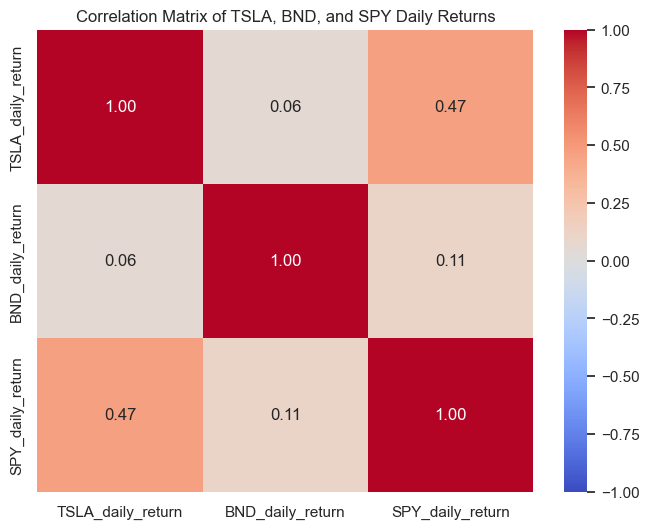

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of daily returns
correlation_matrix = data_returns.corr()

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TSLA, BND, and SPY Daily Returns')
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

# Apply the ADF test on TSLA daily returns
def adf_test(series, name):
    print(f"ADF Test for {name}:")
    result = adfuller(series.dropna())
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

# Perform ADF test for TSLA, BND, and SPY returns
adf_test(data_returns['TSLA_daily_return'], 'TSLA')
adf_test(data_returns['BND_daily_return'], 'BND')
adf_test(data_returns['SPY_daily_return'], 'SPY')

ADF Test for TSLA:
Test Statistic: -34.597544424354716
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4329352851231945), '5%': np.float64(-2.862682171580326), '10%': np.float64(-2.5673780210899224)}
ADF Test for BND:
Test Statistic: -9.981063523903156
p-value: 2.114142301703453e-17
Critical Values: {'1%': np.float64(-3.4329579682301254), '5%': np.float64(-2.8626921885291017), '10%': np.float64(-2.5673833542324727)}
ADF Test for SPY:
Test Statistic: -15.959302399028678
p-value: 7.208499823247474e-29
Critical Values: {'1%': np.float64(-3.4329434877271816), '5%': np.float64(-2.862685793891119), '10%': np.float64(-2.567379949649765)}


In [32]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

# Perform Shapiro-Wilk Test for Normality
def shapiro_test(series, name):
    stat, p_value = shapiro(series.dropna())
    print(f"Shapiro-Wilk Test for {name}:")
    print(f"Test Statistic: {stat}, p-value: {p_value}")
    print("Normality: " + ("Normal" if p_value > 0.05 else "Not Normal"))

# Apply Shapiro-Wilk Test
shapiro_test(data_returns['TSLA_daily_return'], 'TSLA')
shapiro_test(data_returns['BND_daily_return'], 'BND')
shapiro_test(data_returns['SPY_daily_return'], 'SPY')

# Skewness and Kurtosis
print("Skewness and Kurtosis:")
print("TSLA Skewness:", skew(data_returns['TSLA_daily_return']))
print("TSLA Kurtosis:", kurtosis(data_returns['TSLA_daily_return']))

print("BND Skewness:", skew(data_returns['BND_daily_return']))
print("BND Kurtosis:", kurtosis(data_returns['BND_daily_return']))

print("SPY Skewness:", skew(data_returns['SPY_daily_return']))
print("SPY Kurtosis:", kurtosis(data_returns['SPY_daily_return']))

Shapiro-Wilk Test for TSLA:
Test Statistic: 0.9455152002398675, p-value: 1.2186898514338389e-29
Normality: Not Normal
Shapiro-Wilk Test for BND:
Test Statistic: 0.8525167013635302, p-value: 1.271338017275369e-43
Normality: Not Normal
Shapiro-Wilk Test for SPY:
Test Statistic: 0.8886734933269327, p-value: 2.1810382163264882e-39
Normality: Not Normal
Skewness and Kurtosis:
TSLA Skewness: 0.27953118681755296
TSLA Kurtosis: 4.355286670762467
BND Skewness: -0.946589772907931
BND Kurtosis: 37.65819204205666
SPY Skewness: -0.5546531216092465
SPY Kurtosis: 12.706591888861436


In [33]:
print(data_cleaned.columns)

Index(['TSLAClose', 'TSLAHigh', 'TSLALow', 'TSLAOpen', 'TSLAVolume',
       'BNDClose', 'BNDHigh', 'BNDLow', 'BNDOpen', 'BNDVolume', 'SPYClose',
       'SPYHigh', 'SPYLow', 'SPYOpen', 'SPYVolume', 'TSLA_50_MA',
       'TSLA_200_MA', 'TSLA_Rolling_Std'],
      dtype='object')


In [35]:
# Check columns in raw_data
print(raw_data.columns)

Index(['TSLAClose', 'TSLAHigh', 'TSLALow', 'TSLAOpen', 'TSLAVolume',
       'BNDClose', 'BNDHigh', 'BNDLow', 'BNDOpen', 'BNDVolume', 'SPYClose',
       'SPYHigh', 'SPYLow', 'SPYOpen', 'SPYVolume'],
      dtype='object')


In [37]:
# If Date is already the index, no need to extract it separately
data_cleaned.index = raw_data.index

In [38]:
print(data_cleaned.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30'],
              dtype='datetime64[ns]', name='Date', length=2535, freq=None)
